<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Customer_Lifetime_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://www.datacamp.com/tutorial/customer-life-time-value

"Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship".

In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [2]:
data = pd.read_excel("https://raw.githubusercontent.com/Deepaknatural/Training/master/Online_Retail.xlsx", engine="openpyxl")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

<Axes: xlabel='Country'>

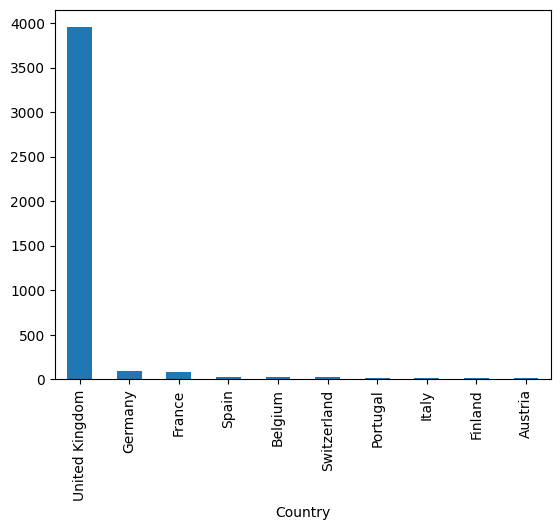

In [5]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [6]:
uk_data=data[data.Country=='United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [7]:
uk_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,495478.000000,495478,495478.000000,361878.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,227.588756,NaN,99.315438,1594.402590


In [9]:
uk_data = uk_data[(uk_data['Quantity']>0)]

In [10]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [11]:
#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [12]:
uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

In [13]:
uk_data_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [14]:
# Change the name of columns
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


 CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

 Customer Value = Average Order Value * Purchase Frequency


In [15]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']

In [16]:
# Calculate Purchase Frequency
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]

In [17]:
# Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]

In [18]:
#Churn Rate
churn_rate=1-repeat_rate

In [20]:
# Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05

In [21]:
# Customer Value
uk_data_group['CLV']=(uk_data_group['avg_order_value']*purchase_frequency)/churn_rate

In [23]:
#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CLV']*uk_data_group['profit_margin']

In [24]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06


prediction model for CLTV

In [25]:
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

In [27]:
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()

In [28]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [30]:
X = sale[['Apr-2011', 'Aug-2011', 'Dec-2010', 'Dec-2011', 'Feb-2011', 'Jan-2011', 'Jul-2011', 'Jun-2011', 'Mar-2011', 'May-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011']]
y=sale[['CLV']]

In [37]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

In [38]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [39]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[-3.86535248e-12]
[[5.30619421e-15 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]


In [40]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 1.0


In [41]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.438537415038318e-12
MSE 1.1719130811166696e-22
RMSE: 1.0825493435020269e-11


check with AI random forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# --- Example of how you might set up for a different model ---
# IMPORTANT: This assumes 'y' (CLV) is a genuinely predictive target, not a direct sum of X
# For demonstration purposes, we'll use your existing X and y, but keep in mind the interpretation.

# Instantiate the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=99)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train.values.ravel()) # .ravel() converts y_train to a 1D array

# Make predictions on the testing set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
print("--- Random Forest Regressor Metrics ---")
print("R-Square:", metrics.r2_score(y_test, y_pred_rf))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

--- Random Forest Regressor Metrics ---
R-Square: 0.9074068027852099
MAE: 246.28993150866467
MSE: 1425472.7690869768
RMSE: 1193.931643389594
